In [41]:
pip install wordcloud

# installs wordcloud which is used as a visual

     -------------------------------------- 153.3/153.3 kB 4.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from keras.preprocessing.text import Tokenizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import nltk 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import re
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from wordcloud import WordCloud
from tabulate import tabulate
from gensim import corpora, models

# pandas (pd): A library for data manipulation and analysis, often used for working with structured data.
# numpy (np): A library for numerical computations and array operations.
# seaborn (sns): A visualization library built on top of matplotlib, used for creating attractive statistical graphics.
# matplotlib.pyplot (plt): A library for creating static, animated, and interactive visualizations in Python.
# sklearn.pipeline.Pipeline: A class for building and managing machine learning pipelines, which are sequences of data processing steps followed by a model.
# keras.preprocessing.text.Tokenizer: A class for tokenizing text data, which splits text into individual words or tokens.
# sklearn.feature_extraction.text.CountVectorizer: A class for converting text data into a matrix of token counts.
# sklearn.feature_extraction.text.TfidfTransformer: A class for transforming a count matrix into a TF-IDF (Term Frequency-Inverse Document Frequency) representation.
# nltk: The Natural Language Toolkit, a library for natural language processing tasks.
# nltk.stem.PorterStemmer: A class for stemming words using the Porter stemming algorithm.
# nltk.stem.WordNetLemmatizer: A class for lemmatizing words using WordNet's lexical database.
# nltk.corpus.wordnet: A module providing access to WordNet, a lexical database for English language.
## nltk.corpus.stopwords: A module providing a list of commonly used stopwords, which are words that are typically considered insignificant and can be ignored in text analysis.
# nltk.tokenize.word_tokenize: A function for tokenizing text into words or tokens.
# nltk.probability.FreqDist: A class for computing and managing frequency distributions of words or tokens in a text.
# re: A module for regular expression operations, used for text pattern matching and manipulation.
# sklearn.base.BaseEstimator, sklearn.base.TransformerMixin: Base classes for creating custom transformer objects in scikit-learn.
# sklearn.feature_extraction.text.TfidfVectorizer: A class for converting text data into a TF-IDF representation, combining tokenization, counting, and TF-IDF transformation in a single step.
# sklearn.naive_bayes.MultinomialNB: A class for implementing the Multinomial Naive Bayes classifier, often used for text classification tasks.
# sklearn.linear_model.LogisticRegression: A class for implementing the logistic regression classifier, commonly used in binary classification tasks.
# sklearn.ensemble.RandomForestClassifier: A class for implementing the random forest classifier, which is an ensemble of decision trees.
# sklearn.model_selection.train_test_split: A function for splitting data into training and testing subsets.
# sklearn.metrics.classification_report, sklearn.metrics.confusion_matrix, sklearn.metrics.accuracy_score: Functions for evaluating the performance of classification models, including generating classification reports, confusion matrices, and calculating accuracy scores.
# sklearn.model_selection.cross_val_score: A function for performing cross-validation, which is a technique for assessing the performance of a model on multiple train-test splits.
# wordcloud.WordCloud: A class for creating word clouds, which are visual representations of word frequency in a text.
# tabulate: A library for creating formatted tables from data.



In [2]:
df = pd.read_csv("TextDataSet.csv")
#reads the data

In [3]:
df.info
# gives some info about the dataset

<bound method DataFrame.info of           Id                                            Comment      Topic
0     0x1aa9  Personally I have no idea what my IQ is. I’ve ...    Biology
1      0x25e  I'm skeptical. A heavier lid would be needed t...    Physics
2     0x1248  I think I have 100 cm of books on the subject....    Biology
3      0x2b9  Is chemistry hard in uni. Ive read somewhere t...  Chemistry
4     0x24af  In addition to the other comment, you can crit...    Physics
...      ...                                                ...        ...
1581  0x22bf  I’m not really denying your intent. I’m a) dou...  Chemistry
1582  0x1f4a  i really empathize with your compassion for bu...    Biology
1583  0x27b7  If you want to keep it for more than 2 weeks, ...  Chemistry
1584  0x2066  Same here. I’m in nursing school so I only hav...    Biology
1585   0x6d6  The video basically says read a pop-sci book a...    Physics

[1586 rows x 3 columns]>

In [4]:
df.head()
# gives the first 5 rows of the dataset

Id                                            Comment      Topic
0  0x1aa9  Personally I have no idea what my IQ is. I’ve ...    Biology
1   0x25e  I'm skeptical. A heavier lid would be needed t...    Physics
2  0x1248  I think I have 100 cm of books on the subject....    Biology
3   0x2b9  Is chemistry hard in uni. Ive read somewhere t...  Chemistry
4  0x24af  In addition to the other comment, you can crit...    Physics

In [5]:
df.count()
#GIVES AMOUNT OF ROWS

Id         1586
Comment    1586
Topic      1586
dtype: int64

In [6]:
df.shape
#Gives the amount of rows and columns

(1586, 3)

In [7]:
df.describe()
#Description of the data

Id                                            Comment    Topic
count     1586                                               1586     1586
unique    1586                                               1539        3
top     0x1aa9  Having access to and being scientifically lite...  Biology
freq         1                                                  2      614

In [8]:
#Feature Extraction and splits the data into 80 20 train and test

X = df['Comment']
Y = df['Topic']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2)

In [9]:
class StepsOfPreProcessing(BaseEstimator,TransformerMixin): #define class, BaseEstimator and TransformerMixin are used in preprocessing

    def __init__(self): # defines an initial funtion and and contains stemming, lemmitisation and stopwords tool to cut some noise 
        self.stemmer = PorterStemmer()
        self.lemm = WordNetLemmatizer()
        self.sw = set(stopwords.words('english'))
    
    def fit(self,X,y=None): # fit function is used to fit x and y and returns self
        return self
    
    def transform(self,X): # defines a function that contains all 3 steps below
        prepro = X.apply(self.step1PreProcess)
        prepro = prepro.apply(self.step2PreProcess)
        prepro = prepro.apply(self.step3PreProcess)
        return prepro
    
    
    def step1PreProcess(self,var1): # this function tokenises and removes stopwords
        var1 = re.sub(r'\W+|\d+',' ',str(var1))
        tokens = nltk.word_tokenize(var1)
        newtokens = [word for word in tokens if word.lower() not in self.sw]
        newvariable = ' '.join(newtokens)
        return(newvariable) # returns the new variable -  tokenised and less noise
    

    def step2PreProcess(self,var1): # Stemming process, removes prefixes and suffiexes
        input = nltk.word_tokenize(str(var1))
        stemmedwords = [self.stemmer.stem(word) for word in input]
        return ' '.join(stemmedwords)

    def step3PreProcess(self,var1): # Lemmitisation process
        input = nltk.word_tokenize(str(var1))
        lemmedwords = [self.lemm.lemmatize(word) for word in input]
        return ' '.join(lemmedwords)

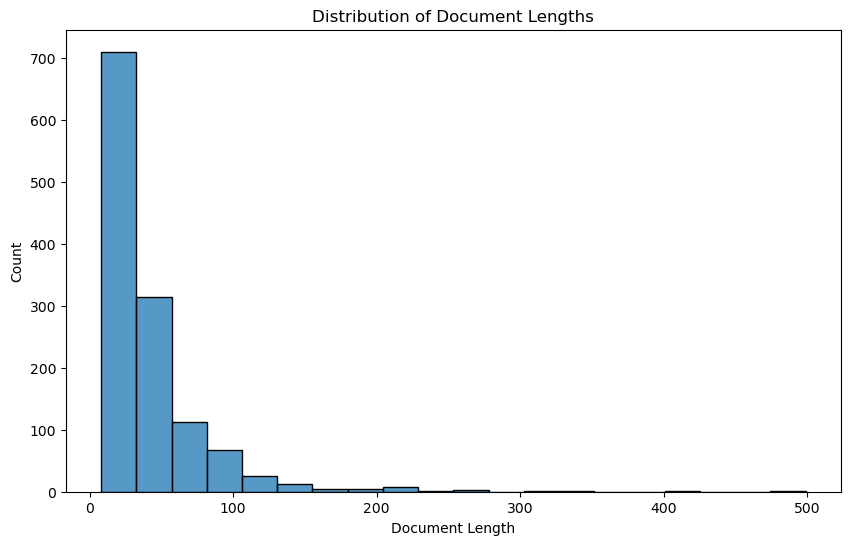

In [10]:
# Visual of the distribution of texts in the dataset

processedwords = StepsOfPreProcessing()
newdata = processedwords.transform(Xtrain)

df['doc_length'] = newdata.apply(lambda x: len(word_tokenize(x)))
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='doc_length', bins=20)
plt.title('Distribution of Document Lengths')
plt.xlabel('Document Length')
plt.ylabel('Count')
plt.show()

[('n', 1460), ('would', 426), ('like', 413), ('get', 342), ('use', 300), ('one', 269), ('make', 240), ('time', 237), ('think', 225), ('know', 209), ('energi', 206), ('also', 201), ('need', 191), ('go', 190), ('work', 187), ('peopl', 177), ('thing', 177), ('say', 176), ('way', 170), ('water', 167)]


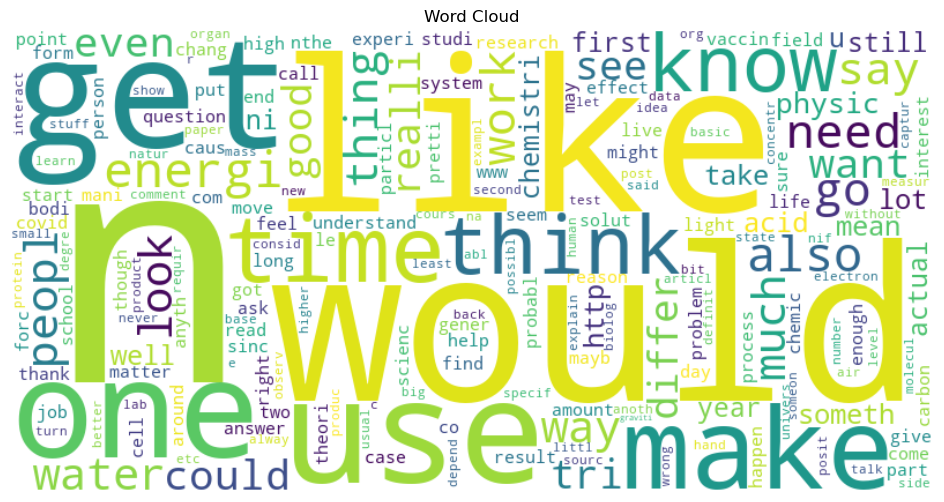

In [11]:
# gives the most frequent words ( top 20) and makes a cloid out of it

all_tokens = [word for text in newdata for word in word_tokenize(text)]
fdist = FreqDist(all_tokens)

# Top 20 most common words
top_words = fdist.most_common(20)
print(top_words)

# Word cloud visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

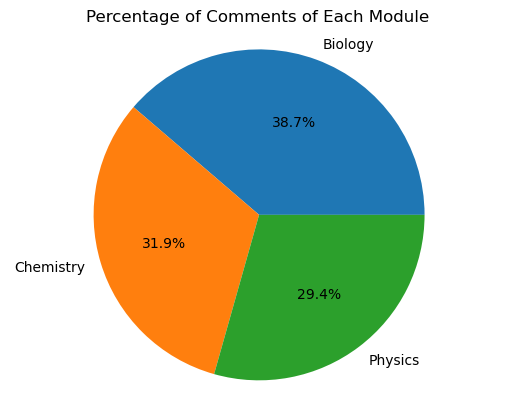

In [12]:
#Displays the % of comments for each module

topiccounts = df['Topic'].value_counts()
modperc = topiccounts/topiccounts.sum()*100

plt.pie(modperc, labels=modperc.index, autopct='%1.1f%%')
plt.title('Percentage of Comments of Each Module')
plt.axis('equal')
plt.show()

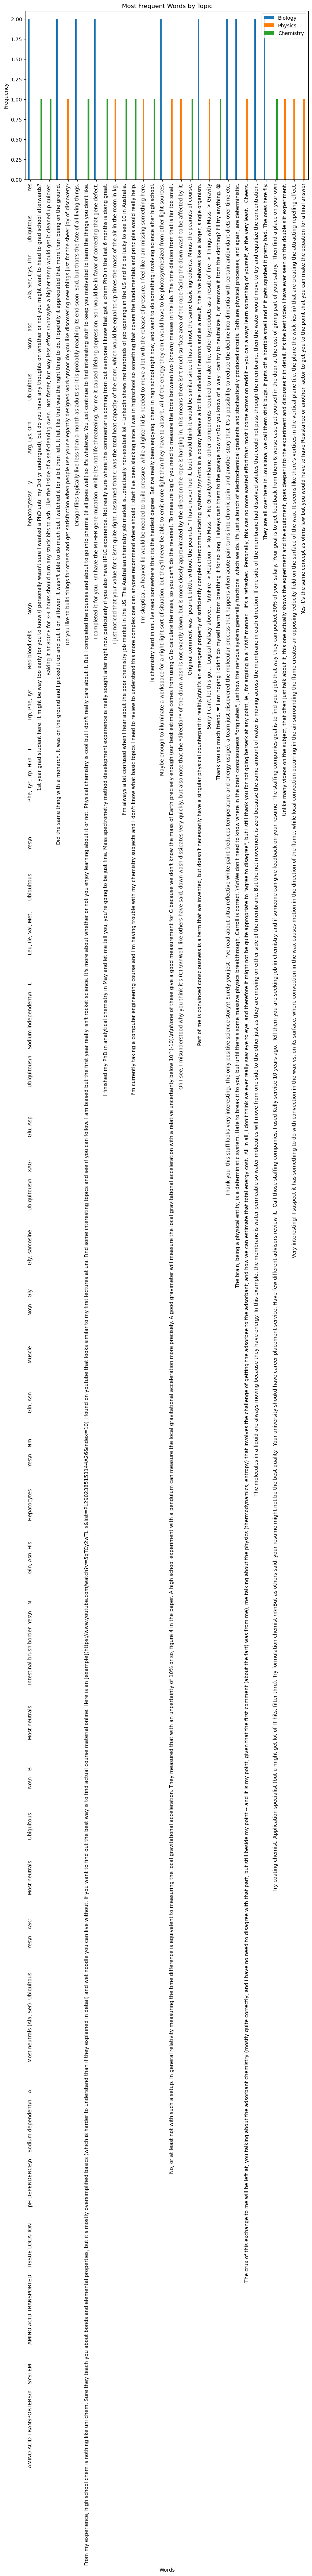

In [13]:
# Displays the most frequent words in each topic and gives the frequency of that word

biowords = df[df['Topic'] == "Biology"]['Comment']
phywords = df[df['Topic'] == "Physics"]['Comment']
chemwords = df[df['Topic'] == "Chemistry"]['Comment']

biowordsfreq = biowords.value_counts().head(10)
phywordsfreq = phywords.value_counts().head(10)
chemwordsfreq = chemwords.value_counts().head(10)

wrdfreqdf = pd.DataFrame({
    "Biology": biowordsfreq,
    "Physics": phywordsfreq,
    "Chemistry": chemwordsfreq
})

fig, ax = plt.subplots(figsize=(10, 6))
wrdfreqdf.plot(kind='bar', ax=ax)

ax.set_xlabel('Words')
ax.set_ylabel('Frequency')
ax.set_title('Most Frequent Words by Topic')
ax.legend()

plt.show()

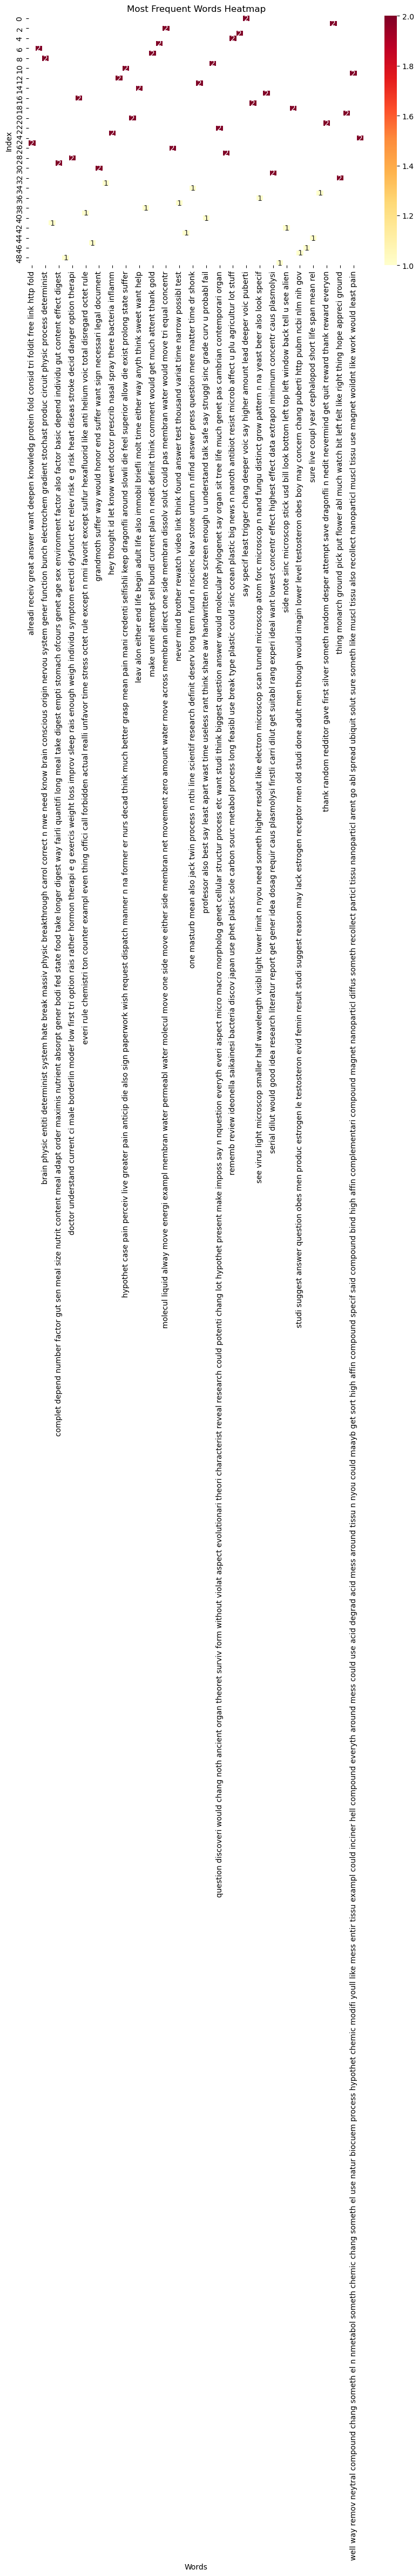

In [14]:
#Heat map of the frequency of words 

commentfreq = newdata.value_counts().head(50)

# Create a DataFrame for the Comment frequencies
commentfreqdf = pd.DataFrame({'Comment': commentfreq.index, 'Frequency': commentfreq.values})

# Pivot the DataFrame to get the word frequencies as columns
pivotdf = commentfreqdf.pivot(index=None, columns='Comment', values='Frequency')

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivotdf, cmap='YlOrRd', annot=True)

# Customize the plot
plt.title('Most Frequent Words Heatmap')
plt.xlabel('Words')
plt.ylabel('Index')

# Display the plot
plt.show()


In [15]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\labs_service_account\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\labs_service_account\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\labs_service_account\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\labs_service_account\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
X = X.dropna()
Y = Y.dropna()

In [17]:
X.isnull().sum()
Y.isnull().sum()

0

In [18]:
# Text Clustering
from sklearn.cluster import KMeans

from sklearn.cluster import KMeans
df = pd.DataFrame({'text': Xtrain})
tfidfvec =  TfidfVectorizer()
Xtr = tfidfvec.fit_transform(df['text'])

k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(Xtr)
df['cluster'] = kmeans.labels_

for cluster_id in range(k):
    cluster_docs = df[df['cluster'] == cluster_id]['text']
    print(f"Cluster {cluster_id + 1}")
    print(cluster_docs)
    print()


Cluster 1
263     DMSO and H2O has the same solubility, so makes...
363     Possibly. Denaturation is not the same thing a...
1500    There was another post that said something sim...
691     The red colour is prodigiosin, an anti bacteri...
1558    Like everything in chemistry,[ there are many ...
                              ...                        
10      Essentially, it is the change in volume betwee...
1015    If the temperature of the salt is extremely ho...
1478    You will need to do more experiments in formul...
830     I wouldn’t think that the speed at which you e...
359     Lol.. No perpetual motion. Just a difference o...
Name: text, Length: 323, dtype: object

Cluster 2
1570    It will be aluminium oxide and is perfectly sa...
1494    Nah not really. Radiation at high doses could ...
306     I can provide logical facts but it’s up to you...
924     I think you’re right about them being epiphyte...
105     The vaccine mRNA particles won’t have traveled...
            

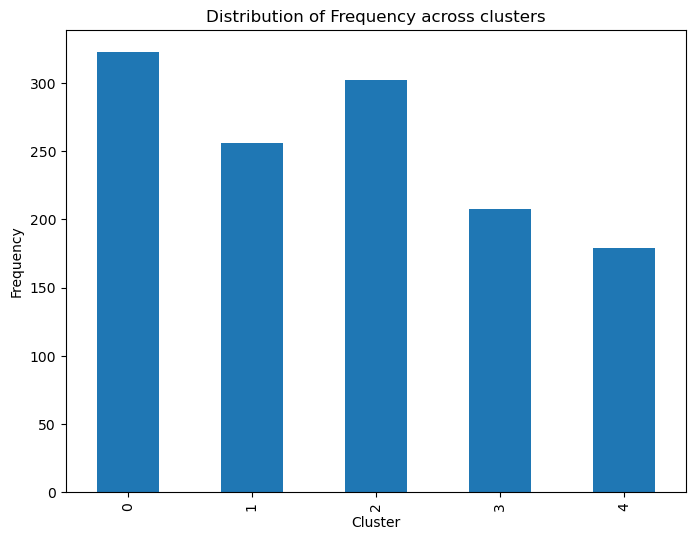

In [19]:
clustercount = df['cluster'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
clustercount.plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Frequency')
plt.title('Distribution of Frequency across clusters')
plt.show()

Random Forest Classification Accuracy Score:  77.35849056603774

Classification Report - Random Forest

               precision    recall  f1-score   support

     Biology       0.71      0.88      0.79       127
   Chemistry       0.78      0.73      0.76        93
     Physics       0.90      0.67      0.77        98

    accuracy                           0.77       318
   macro avg       0.80      0.76      0.77       318
weighted avg       0.79      0.77      0.77       318


Confusion Matrix - Random Forest

 [[112  10   5]
 [ 23  68   2]
 [ 23   9  66]]


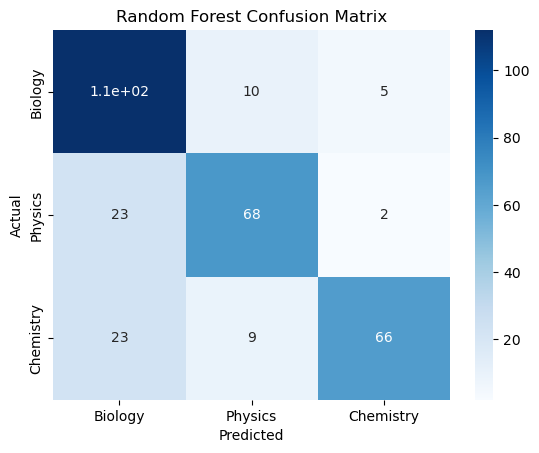

In [20]:
#Text Classification Analysis


# Uses random forest in the pipline
RFpreprocesspl = Pipeline([
    ('preprocess',StepsOfPreProcessing()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', RandomForestClassifier())
])


if Xtrain is None:
    print('Xtrain is none')
elif Ytrain is None:
    print ('Ytrain is None')
else:
    RFpreprocesspl.fit(Xtrain,Ytrain)
    RFprediction = RFpreprocesspl.predict(Xtest)
    RFaccscore = accuracy_score(Ytest,RFprediction)
    print("Random Forest Classification Accuracy Score: ",RFaccscore*100)

print("\nClassification Report - Random Forest")
rfclassreport = (classification_report(Ytest,RFprediction))
print('\n',rfclassreport)
rfcm = confusion_matrix(Ytest,RFprediction)
print("\nConfusion Matrix - Random Forest")
print('\n',rfcm)
topic = ['Biology', 'Physics', 'Chemistry']

# Create a heatmap of the confusion matrix
sns.heatmap(rfcm, annot=True, cmap='Blues', xticklabels=topic, yticklabels=topic)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')

# Show the plot
plt.show()

Naive Bayers Classification Accuracy Score:  83.33333333333334

Classification report - Naive Bayers

               precision    recall  f1-score   support

     Biology       0.82      0.89      0.85       127
   Chemistry       0.80      0.86      0.83        93
     Physics       0.90      0.73      0.81        98

    accuracy                           0.83       318
   macro avg       0.84      0.83      0.83       318
weighted avg       0.84      0.83      0.83       318


Confusion Matrix - Naive Bayers

 [[113  10   4]
 [  9  80   4]
 [ 16  10  72]]


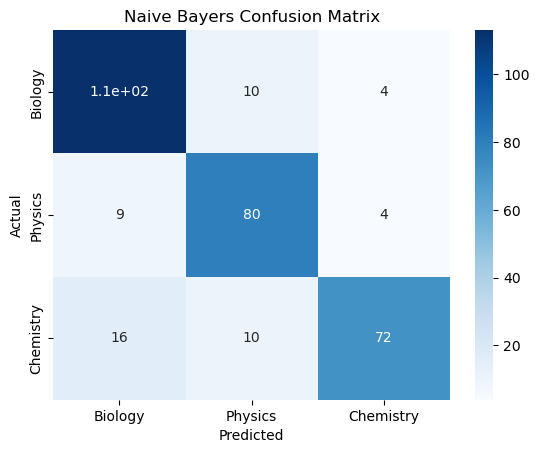

In [21]:
# creates a pipeline which contains the naive bayes classification method 
NBpreprocesspl = Pipeline([
    ('preprocess',StepsOfPreProcessing()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', MultinomialNB())
])

if Xtrain is None:
    print('Xtrain is none')
elif Ytrain is None:
    print ('Ytrain is None')
else:
    NBpreprocesspl.fit(Xtrain,Ytrain)
    NBprediction = NBpreprocesspl.predict(Xtest)
    NBaccscore = accuracy_score(Ytest,NBprediction)
    print("Naive Bayers Classification Accuracy Score: ",NBaccscore*100)    

print("\nClassification report - Naive Bayers")
nbclassreport = classification_report(Ytest, NBprediction)
print('\n',nbclassreport)
nbcm = confusion_matrix(Ytest,NBprediction)
print("\nConfusion Matrix - Naive Bayers")
print('\n',nbcm)

sns.heatmap(nbcm, annot=True, cmap='Blues', xticklabels=topic, yticklabels=topic)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayers Confusion Matrix')

# Show the plot
plt.show()

Logistic Regression Classification Accuracy Score:  81.76100628930818

Classification Report - Logistic Regression

               precision    recall  f1-score   support

     Biology       0.83      0.87      0.85       127
   Chemistry       0.76      0.85      0.80        93
     Physics       0.88      0.72      0.79        98

    accuracy                           0.82       318
   macro avg       0.82      0.81      0.81       318
weighted avg       0.82      0.82      0.82       318


Confusion Matrix - Logistic Regression

 [[110  13   4]
 [  8  79   6]
 [ 15  12  71]]


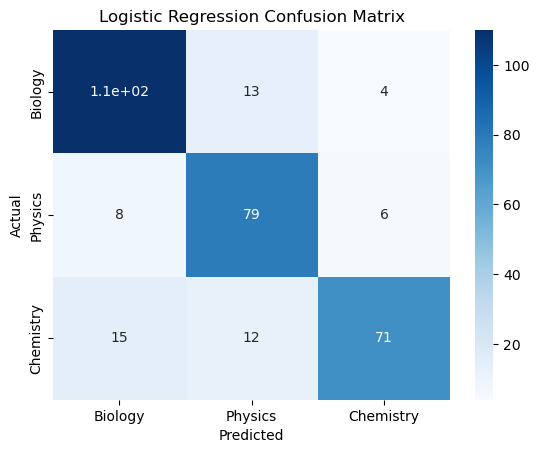

In [22]:
#Contains the logistice regresion pipeline
LRpreprocesspl = Pipeline([
    ('preprocess',StepsOfPreProcessing()),
    ('tfidf', TfidfVectorizer()),
    ('classifier', LogisticRegression())
])

if Xtrain is None:
    print('Xtrain is none')
elif Ytrain is None:
    print ('Ytrain is None')
else:
    LRpreprocesspl.fit(Xtrain,Ytrain)
    LRprediction = LRpreprocesspl.predict(Xtest)
    LRaccscore = accuracy_score(Ytest,LRprediction)
    print("Logistic Regression Classification Accuracy Score: ",LRaccscore*100)

    
print('\nClassification Report - Logistic Regression')
lrclassreport = classification_report(Ytest, LRprediction)
print("\n",lrclassreport)
lrcm = confusion_matrix(Ytest,LRprediction)
print("\nConfusion Matrix - Logistic Regression")
print('\n',lrcm)
sns.heatmap(lrcm, annot=True, cmap='Blues', xticklabels=topic, yticklabels=topic)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')

# Show the plot
plt.show()

In [23]:
#Sentiment Analysis
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\labs_service_account\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [24]:
# Performs sentiment analysis on each text

sia = SentimentIntensityAnalyzer()
sentiment_scores = []
for text in Xtrain:
    siascores = sia.polarity_scores(text)
    sentiment_scores.append(siascores)
    
for text, scores in zip(Xtrain, sentiment_scores):
    print("Text:", text)
    print("Sentiment Scores:", scores)
    print()


Text: The 2021 Ig Nobel prize may have been remote, but it wasn’t remotely the least interesting. There were a plethora of interesting scientific works in the prizes \[1\]. Particularly interesting for me was the prize for physics and kinetic, which were related.  These prizes were for attempting to understand how human crowds self-organize.\n\nThe physics prize \[2\] looked at modeling human crowds and showed that by tracking actual human interactions that we can be described quite well with simple long-range (sight) and short-range interaction terms. Using this fluid dynamics approach they showed good agreement in describing real interactions. The same group previously attempted to direct pedestrians but was not very successful \[3\], suggesting we still need to develop how to introduce external forces.\n\nThe kinetics prize \[4\] was given for investigating the effect of people on phones in crowds. No shocker here, they are the worst and slow everyone down. But it is still important

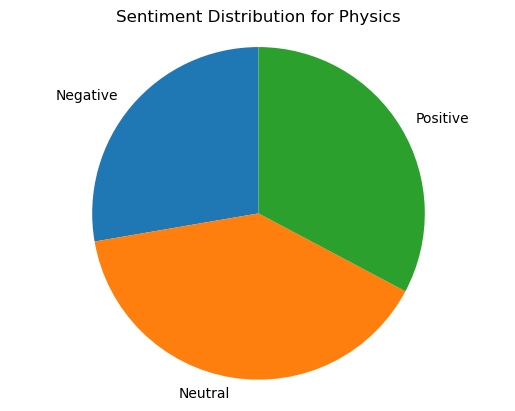

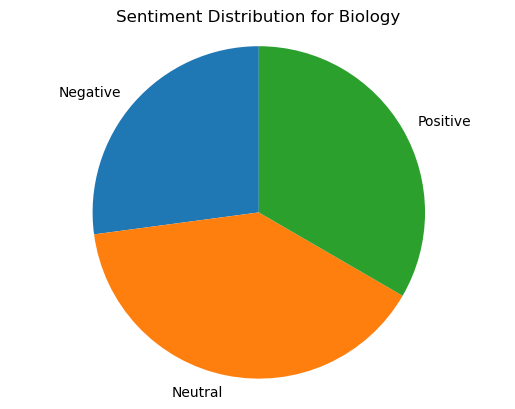

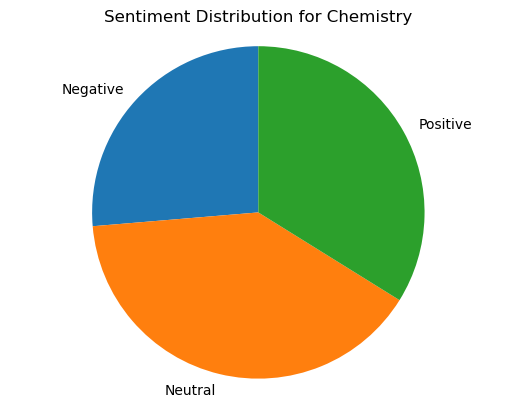

In [25]:
#Visual of the percentage of positive, negative and neutral comments for each module

sentiment_counts = {
    'Physics': {'Negative': 0, 'Neutral': 0, 'Positive': 0},
    'Biology': {'Negative': 0, 'Neutral': 0, 'Positive': 0},
    'Chemistry': {'Negative': 0, 'Neutral': 0, 'Positive': 0}
}

# Count the sentiment types for each topic
for topic, scores in zip(Ytrain, sentiment_scores):
    sentiment_counts[topic]['Negative'] += int(scores['neg'] > 0)
    sentiment_counts[topic]['Neutral'] += int(scores['neu'] > 0)
    sentiment_counts[topic]['Positive'] += int(scores['pos'] > 0)
   # sentiment_counts[topic]['Compund'] += int(scores['compound'] > 0)

# Plot pie charts for each topic
for topic in sentiment_counts:
    sentiment_labels = list(sentiment_counts[topic].keys())
    sentiment_values = list(sentiment_counts[topic].values())

    # Create the pie chart
    plt.figure()
    plt.pie(sentiment_values, labels=sentiment_labels,  startangle=90)
    plt.title(f"Sentiment Distribution for {topic}")
    plt.axis('equal')
    plt.show()


Text(0.5, 1.0, 'Average Sentiment for Each Topic')

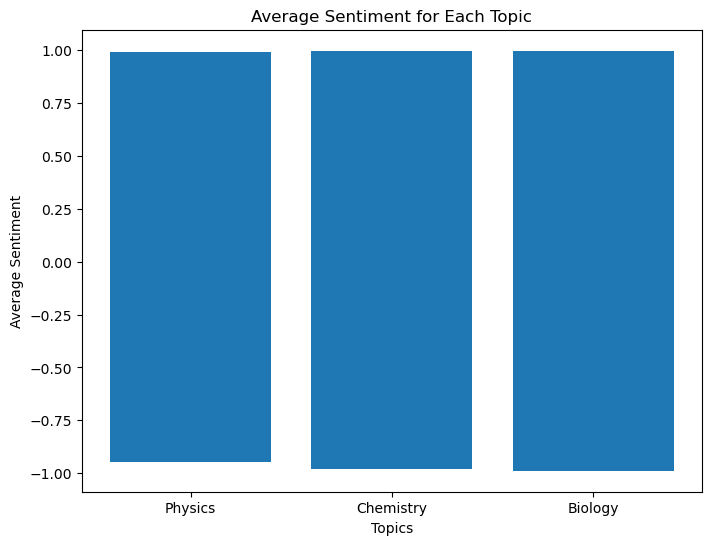

In [26]:
average_sentiments = [np.mean(scores['compound']) for scores in sentiment_scores]

plt.figure(figsize=(8, 6))
plt.bar(Ytrain, average_sentiments)
plt.xlabel('Topics')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment for Each Topic')
#plt.ylim([-1, 1])

In [27]:
# Word frequency analysis
#count_vectorizer = CountVectorizer()
#word_frequency = count_vectorizer.fit_transform(Xtrain)

# Get the feature names (words)
#featurenames = count_vectorizer.get_feature_names()

# Print the word frequencies for each document
#for i, xtr in enumerate(Xtrain):
 #   print(f"X Train {i+1}:")
  #  for j, word in enumerate(feature_names):
   #     frequency = word_frequency[i,j]
    #    if frequency > 0:
     #       print(f"{word}: {frequency}")
    #print()



In [28]:
# TF-IDF analysis

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(Xtrain)
feature_names = tfidf_vectorizer.get_feature_names()


# Print the TF-IDF values for each document
for i, xtr in enumerate(Xtrain):
    print(f"Document {i+1}:")
    feature_index = tfidf_matrix[i, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[i, x] for x in feature_index])
    for word_index, score in tfidf_scores:
        if score>.30:
            print(f"{feature_names[word_index]}: {score}")
            


C:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Document 1:
www: 0.3607550453755961
Document 2:
solubility: 0.43513964837851393
Document 3:
tests: 0.3315404194253198
iq: 0.3694213525643748
Document 4:
protein: 0.34384513744807554
Document 5:
ive: 0.49785663887340026
school: 0.3005324283839942
Document 6:
inhale: 0.37553548372392453
oxide: 0.35853343764236206
aluminium: 0.4165005678695852
Document 7:
fluffy: 0.3395517991531834
snow: 0.32107877986571504
Document 8:
hydrogen: 0.32798554895426474
push: 0.3646673865629925
Document 9:
Document 10:
inhibit: 0.49419993147908536
Document 11:
flow: 0.45047818828218944
looking: 0.3398449360384851
Document 12:
breathed: 0.3276366481567349
Document 13:
covid: 0.3197328713872422
Document 14:
Document 15:
Document 16:
Document 17:
college: 0.30126523737161603
class: 0.30694554861181117
Document 18:
benefits: 0.3689481596956233
relationship: 0.32982423171576114
Document 19:
Document 20:
baby: 0.3829521094507441
Document 21:
multi: 0.5494362940002211
Document 22:
vi: 0.5351688801691977
gonna: 0.3413

Document 346:
nutins: 0.5002081145046455
degrees: 0.3745793637941735
force: 0.3008443873935112
pulling: 0.3799515476139162
Document 347:
Document 348:
Document 349:
solute: 0.4297246938055791
concentration: 0.3060199632943102
Document 350:
copper: 0.4141700579114637
Document 351:
catalyst: 0.3660519356562273
Document 352:
believe: 0.3808593391400884
Document 353:
wax: 0.3888508516088048
convection: 0.4192392190969159
Document 354:
length: 0.3006860248197451
rope: 0.6604542781556749
Document 355:
dogs: 0.39726844597302013
Document 356:
congress: 0.332340404276787
Document 357:
holds: 0.30432744741442613
Document 358:
Document 359:
mrna: 0.3560545451258989
Document 360:
datura: 0.3190179791048757
Document 361:
tomato: 0.4903562301113088
tobacco: 0.3677671725834816
Document 362:
kinematics: 0.31142228230250446
calculus: 0.546268801582593
Document 363:
decay: 0.3301444475723458
Document 364:
time: 0.4207770457773392
Document 365:
Document 366:
capitalism: 0.3138516391704437
obscurity: 0.31

adults: 0.36144034325315144
Document 530:
Document 531:
mount: 0.35763288047212544
megaphone: 0.3782090116682061
speaker: 0.35763288047212544
Document 532:
aromatic: 0.31231800081265754
Document 533:
empathetic: 0.4130390821091539
intelligent: 0.37068553176729324
Document 534:
desiccant: 0.31460473759207597
Document 535:
memes: 0.6291831083444838
Document 536:
distillation: 0.3476421019348069
distillations: 0.36764342141429285
clevenger: 0.36764342141429285
Document 537:
r2: 0.39719071825904523
resistance: 0.47182168496675114
path: 0.35812486229014784
Document 538:
gc: 0.3182985970439409
concentration: 0.3261256894134232
molar: 0.3182985970439409
Document 539:
levels: 0.37894530719550235
20: 0.36320866585977474
oxygen: 0.39358855451969904
Document 540:
nbruh: 0.36074927126221423
begin: 0.30011017362245557
idea: 0.4179558218500039
Document 541:
galaxies: 0.3587426853165195
dark: 0.3074024086513529
Document 542:
handed: 0.4248550842111175
couples: 0.4248550842111175
weak: 0.3276745251326

the: 0.314465473463626
Document 724:
wiki: 0.3533807120659323
Document 725:
math: 0.3361779105477687
Document 726:
deeper: 0.4753017329087443
voice: 0.49538157903937896
Document 727:
min: 0.303008692443319
inch: 0.32044206322577007
oz: 0.32044206322577007
fl: 0.32044206322577007
feet: 0.303008692443319
Document 728:
Document 729:
Document 730:
yourself: 0.34107151981654465
Document 731:
target: 0.44376508218581096
bullet: 0.47629211952775885
the: 0.35029597127320744
Document 732:
Document 733:
sci: 0.4747656327262379
video: 0.3711865306864636
Document 734:
Document 735:
vaccinated: 0.38786593866120306
Document 736:
Document 737:
meetings: 0.39868762028651455
Document 738:
radiate: 0.324910703680187
Document 739:
bcs: 0.3180767274792277
superconductivity: 0.30509245904056437
Document 740:
Document 741:
centrifugal: 0.3433467348901714
force: 0.6830306785899382
Document 742:
morphine: 0.501508253983121
Document 743:
bull: 0.5124001003028514
shit: 0.390688677849949
Document 744:
stopping: 

o2: 0.37278430692179054
Document 939:
contain: 0.47229424941212644
Document 940:
Document 941:
chemists: 0.35797552050756565
phd: 0.30439704970177894
Document 942:
expansion: 0.3261364341004359
Document 943:
rocks: 0.48970099834488046
Document 944:
bonded: 0.5444077218800819
Document 945:
medical: 0.5558519278379518
Document 946:
foldit: 0.3064640663984105
deepen: 0.3064640663984105
Document 947:
Document 948:
technology: 0.3711650057049676
blind: 0.38876605450074003
Document 949:
Document 950:
Document 951:
Document 952:
away: 0.31113229108959833
10: 0.3431985555597589
Document 953:
number: 0.5549239884033452
Document 954:
atmosphere: 0.33593573751800315
co2: 0.31602654152796983
Document 955:
Document 956:
paraffin: 0.4188004797585086
Document 957:
cn: 0.3025671673597825
hcn: 0.3025671673597825
form: 0.3541566403820186
Document 958:
produce: 0.343383959134591
Document 959:
jam: 0.30709452502600226
monster: 0.30709452502600226
little: 0.37255378654761484
Document 960:
searches: 0.37266

applying: 0.3087055314924327
Document 1111:
stock: 0.38886942693510895
dilutions: 0.31109554154808716
Document 1112:
bastards: 0.4326757398186605
clever: 0.4091363938136525
Document 1113:
Document 1114:
h3r: 0.3137925288715722
Document 1115:
light: 0.35131846109344084
Document 1116:
slightly: 0.43768978170812256
mass: 0.3505659704827707
Document 1117:
bizarre: 0.30210062237159985
Document 1118:
polarity: 0.35805718101722367
magnet: 0.3321035662243452
Document 1119:
it: 0.34601034416579884
Document 1120:
masters: 0.32759775382352346
Document 1121:
think: 0.3229444277285732
read: 0.3048628189904812
Document 1122:
vocal: 0.5176268420456774
pitch: 0.5176268420456774
testosterone: 0.364423545764674
Document 1123:
insight: 0.30326929666242575
Document 1124:
Document 1125:
influenza: 0.4141921250011221
virus: 0.306047987588161
Document 1126:
cl₂: 0.4185920632459034
bottle: 0.31346142574119473
Document 1127:
bermuda: 0.32647446940458474
triangle: 0.30871291082878666
Document 1128:
evolution: 0

In [35]:
#Latent Dirichlet Allocation

#mydocs = StepsOfPreProcessing.transform(df["Comment"])
##mydict = corpora.Dictionary(StepsOfPreProcessing())
#mybow = [mydict.doc2bow(tokens) for tokens in mydocs]
#lda = models.LdaModel(mybow,num_topics=2,id2word=mydict, passes = 10)

#for topic in range(2):
 #   print(f"Topic #{topic+1}:")
  #  print(lda.print_topic(topic))
   # print()